<a href="https://colab.research.google.com/github/gowripriya15/Stock_price_prediction/blob/main/LSTM_FB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**STOCK_PRICE_PREDICTION_FOR_LARGE_CAP_TECH_COMPANIES**
In this project,we will predict the stock price for various companies with the help of historical data and news-headlines by applying the LSTM model(Long Short-Term Memory).

**IMPORTING REQUIRED LIBRARIES**

In [299]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
import matplotlib.pyplot as plt
plt.style.use('seaborn')

**UPLOADING DATASETS**

In [300]:
from google.colab import files
uploaded = files.upload()

Saving facebook_merge_news_headlines.csv to facebook_merge_news_headlines (4).csv


In [301]:
import io
fb_data=pd.read_csv(io.BytesIO(uploaded['facebook_merge_news_headlines.csv']))
fb_data = pd.read_csv("facebook_merge_news_headlines.csv", parse_dates=['Date'])
fb_data





,Date,Headlines
0,2015-01-01,What Can We Expect From Apple Inc. In 2015? 1 ...
1,2015-02-01,What to expect from Apple in 2015 beyond its s...
2,2015-03-01,Mountie: An inexpensive and innovative way to ...
3,2015-04-01,"Donald Yacktman on the Sources of Moats, His C..."
4,2015-05-01,"SIM-free iPhone 6, 6 Plus reportedly debuting ..."
...,...,...
2360,2021-06-19,Best pre-Prime Day smartwatch deals on Apple W...
2361,2021-06-20,iPhone 13 rumors: As Apple's fall event gets c...
2362,2021-06-21,Apple is shortening new free TV Plus trials fr...
2363,2021-06-22,Google likely to soon face antitrust claims ov...


In [302]:
from google.colab import files
uploaded = files.upload()

Saving HistoricalData_FB.csv to HistoricalData_FB (4).csv


In [303]:

df=pd.read_csv(io.BytesIO(uploaded['HistoricalData_FB.csv']))

**CHECKING NULL VALUES**

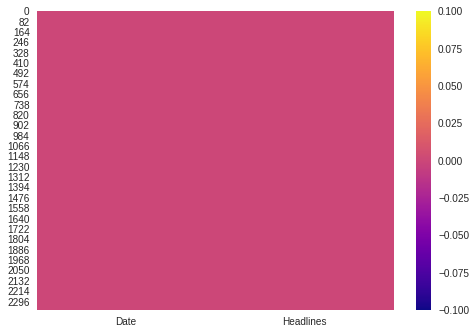

In [304]:
import seaborn as sns
sns.heatmap(fb_data.isnull(),cmap='plasma')

In [305]:
fb_data.sort_index(inplace=True)

In [306]:
df = pd.read_csv("HistoricalData_FB.csv", parse_dates=['Date'])
df.head()

,Date,Close/Last,Volume,Open,High,Low
0,2021-06-09,$330.25,13727950,$335.74,$336.8,$330
1,2021-06-08,$333.68,14580460,$336.7,$338.2999,$332.24
2,2021-06-07,$336.58,20136710,$329.48,$337.69,$328.93
3,2021-06-04,$330.35,13289380,$325.9,$332.455,$325.18
4,2021-06-03,$326.04,12610790,$325.78,$327.375,$323.48


In [307]:
df.rename(columns={"Close/Last":"Close"},inplace = True)



In [308]:
df.sort_values('Date', inplace=True)

In [309]:
df.reset_index()

,index,Date,Close,Volume,Open,High,Low
0,2278,2012-05-18,$38.2318,579377500,$42,$45,$38
1,2277,2012-05-21,$34.03,167943600,$36.53,$36.66,$33
2,2276,2012-05-22,$31,101667700,$32.61,$33.59,$30.94
3,2275,2012-05-23,$32,73541150,$31.37,$32.5,$31.36
4,2274,2012-05-24,$33.03,50208760,$32.95,$33.21,$31.77
...,...,...,...,...,...,...,...
2274,4,2021-06-03,$326.04,12610790,$325.78,$327.375,$323.48
2275,3,2021-06-04,$330.35,13289380,$325.9,$332.455,$325.18
2276,2,2021-06-07,$336.58,20136710,$329.48,$337.69,$328.93
2277,1,2021-06-08,$333.68,14580460,$336.7,$338.2999,$332.24


In [310]:
df.columns

Index(['Date', 'Close', 'Volume', 'Open', 'High', 'Low'], dtype='object')

**MERGING THE HISTORICAL DATASET AND NEWS_HEADLINES DATASET**

In [311]:
data = pd.merge(fb_data, df, how='inner', on=['Date'])

In [312]:
data

,Date,Headlines,Close,Volume,Open,High,Low
0,2015-04-01,"Donald Yacktman on the Sources of Moats, His C...",$81.665,22028080,$82.5,$82.72,$80.87
1,2015-05-01,"SIM-free iPhone 6, 6 Plus reportedly debuting ...",$78.99,22811310,$79.24,$79.76,$78.11
2,2015-06-01,"Technology Transforming Cars Into ""Phones On W...",$80.29,18106110,$79.3,$80.38,$78.66
3,2015-07-01,Apple issues fourth developer beta of OS X 10....,$86.91,25198260,$86.77,$87.95,$86.49
4,2015-09-01,Samsung is reportedly making a secret new chip...,$87.23,35958020,$86.85,$89.39,$86.5
...,...,...,...,...,...,...,...
1590,2021-05-27,&quot;Friends: The Reunion&quot;: The Best Non...,$332.75,20477730,$328,$333.78,$326.76
1591,2021-05-28,Apple pushes back launch of podcast subscripti...,$328.73,12037430,$331,$332.8684,$328.33
1592,2021-01-06,Judge dismisses charges against Apple security...,$263.31,24354150,$262,$267.75,$260.01
1593,2021-04-06,"Global equities nearly grasp all-time record, ...",$306.26,17335250,$308.837,$311.35,$305.25


In [313]:
data["Close"] = data["Close"].str.replace('$', '').astype(float)
data["Open"] = data["Open"].str.replace('$', '').astype(float)
data["High"] = data["High"].str.replace('$', '').astype(float)
data["Low"] = data["Low"].str.replace('$', '').astype(float)

In [314]:
data.head()

,Date,Headlines,Close,Volume,Open,High,Low
0,2015-04-01,"Donald Yacktman on the Sources of Moats, His C...",81.665,22028080,82.50,82.72,80.87
1,2015-05-01,"SIM-free iPhone 6, 6 Plus reportedly debuting ...",78.990,22811310,79.24,79.76,78.11
2,2015-06-01,"Technology Transforming Cars Into ""Phones On W...",80.290,18106110,79.30,80.38,78.66
3,2015-07-01,Apple issues fourth developer beta of OS X 10....,86.910,25198260,86.77,87.95,86.49
4,2015-09-01,Samsung is reportedly making a secret new chip...,87.230,35958020,86.85,89.39,86.50


In [315]:
data.reset_index(inplace=True)
data_1=data[["Date","Close"]]

In [316]:
data_1=data[["Date","Close"]]

In [317]:
data_1=data_1.rename(columns={"Date": "ds", "Close": "y"})

In [318]:
data_1.head()

,ds,y
0,2015-04-01,81.665
1,2015-05-01,78.990
2,2015-06-01,80.290
3,2015-07-01,86.910
4,2015-09-01,87.230


**Prophet model**:Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data.

In [319]:
from fbprophet import Prophet
m = Prophet(daily_seasonality = True) # the Prophet class (model)
m.fit(data_1) 

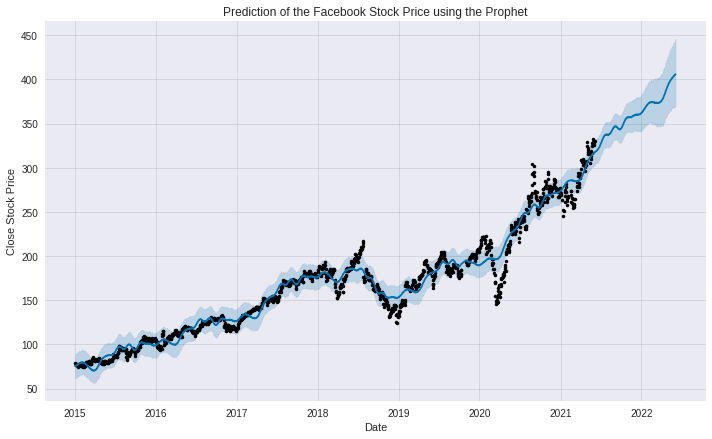

In [320]:
future = m.make_future_dataframe(periods=365) #we need to specify the number of days in future
prediction = m.predict(future)
m.plot(prediction)
plt.title("Prediction of the Facebook Stock Price using the Prophet")
plt.xlabel("Date")
plt.ylabel("Close Stock Price")
plt.show()

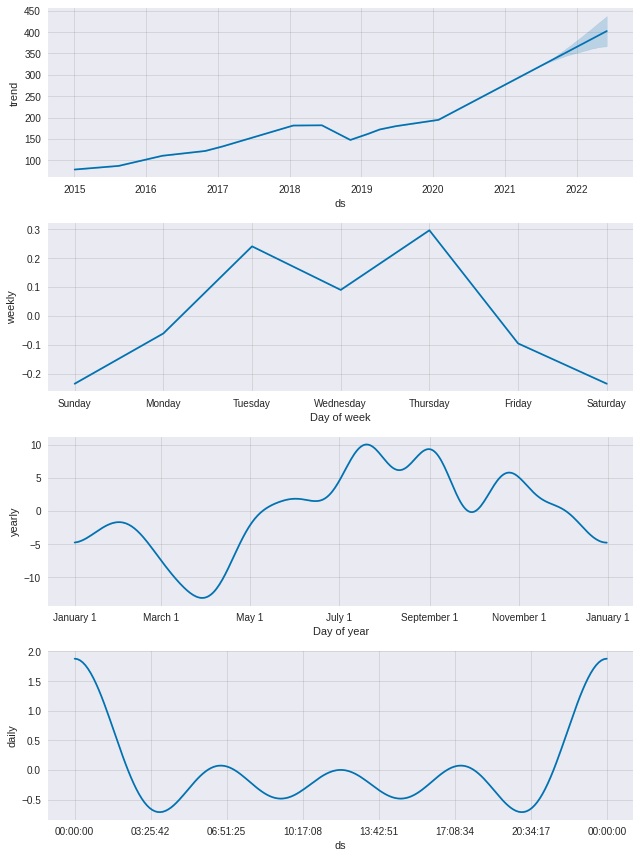

In [321]:
m.plot_components(prediction)
plt.show()

In [322]:
data.set_index("Date", inplace = True)
data.head()

,index,Headlines,Close,Volume,Open,High,Low
Date,,,,,,,
2015-04-01,0,"Donald Yacktman on the Sources of Moats, His C...",81.665,22028080,82.50,82.72,80.87
2015-05-01,1,"SIM-free iPhone 6, 6 Plus reportedly debuting ...",78.990,22811310,79.24,79.76,78.11
2015-06-01,2,"Technology Transforming Cars Into ""Phones On W...",80.290,18106110,79.30,80.38,78.66
2015-07-01,3,Apple issues fourth developer beta of OS X 10....,86.910,25198260,86.77,87.95,86.49
2015-09-01,4,Samsung is reportedly making a secret new chip...,87.230,35958020,86.85,89.39,86.50


In [323]:
data.sort_index(ascending=True,inplace=True)
data.head()

,index,Headlines,Close,Volume,Open,High,Low
Date,,,,,,,
2015-01-02,20,"Apple Loop: iOS 8.1.3 Angers Users, Outlook Ar...",78.450,18141830,78.58,78.9300,77.700
2015-01-05,82,"Apple Watch interest described as &quot;tepid,...",77.190,26392340,77.98,79.2455,76.860
2015-01-06,102,Apple&quot;s TV Service Delayed: Getting Local...,76.150,27365180,77.23,77.5900,75.365
2015-01-07,123,Apple Inc. leaks new iPod colors in iTunes 12....,76.150,22015250,76.76,77.3600,75.820
2015-01-08,145,Nomura Begins Coverage on Apple (AAPL) IBM cou...,78.175,23931830,76.74,78.2300,76.080


In [324]:
data.shape

(1595, 7)

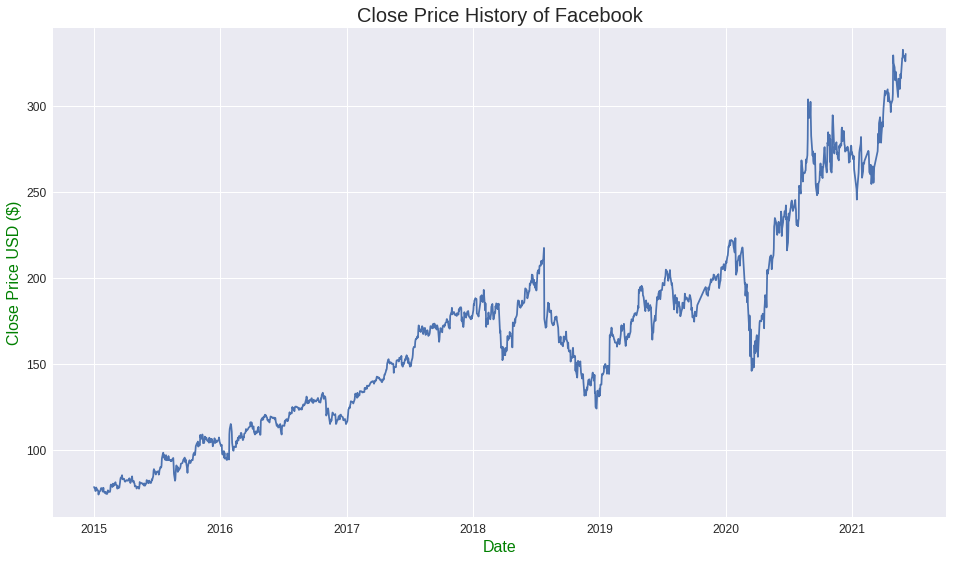

In [325]:
plt.figure(figsize=(16,9))
plt.title('Close Price History of Facebook', fontsize = 20)
plt.plot(data['Close'])
plt.xlabel('Date', fontsize = 16, color = 'g')
plt.ylabel('Close Price USD ($)', fontsize = 16, color = 'g')
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

In [326]:
import os

In [327]:
data.to_csv('NewsandHistoricaldata.csv')

In [328]:
os.getcwd()

'/content'

**SENTIMENT ANALYSIS**

In [329]:
data['compound'] = ''
data['negative'] = ''
data['neutral'] = ''
data['positive'] = ''
data.head()

,index,Headlines,Close,Volume,Open,High,Low,compound,negative,neutral,positive
Date,,,,,,,,,,,
2015-01-02,20,"Apple Loop: iOS 8.1.3 Angers Users, Outlook Ar...",78.450,18141830,78.58,78.9300,77.700,,,,
2015-01-05,82,"Apple Watch interest described as &quot;tepid,...",77.190,26392340,77.98,79.2455,76.860,,,,
2015-01-06,102,Apple&quot;s TV Service Delayed: Getting Local...,76.150,27365180,77.23,77.5900,75.365,,,,
2015-01-07,123,Apple Inc. leaks new iPod colors in iTunes 12....,76.150,22015250,76.76,77.3600,75.820,,,,
2015-01-08,145,Nomura Begins Coverage on Apple (AAPL) IBM cou...,78.175,23931830,76.74,78.2300,76.080,,,,


In [330]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [331]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import unicodedata


sid = SentimentIntensityAnalyzer()

data['compound'] = data['Headlines'].apply(lambda x: sid.polarity_scores(x)['compound'])
data['negative'] = data['Headlines'].apply(lambda x: sid.polarity_scores(x)['neg'])
data['neutral'] = data['Headlines'].apply(lambda x: sid.polarity_scores(x)['neu'])
data['positive'] = data['Headlines'].apply(lambda x: sid.polarity_scores(x)['pos'])


data.head()

,index,Headlines,Close,Volume,Open,High,Low,compound,negative,neutral,positive
Date,,,,,,,,,,,
2015-01-02,20,"Apple Loop: iOS 8.1.3 Angers Users, Outlook Ar...",78.450,18141830,78.58,78.9300,77.700,0.1943,0.116,0.749,0.135
2015-01-05,82,"Apple Watch interest described as &quot;tepid,...",77.190,26392340,77.98,79.2455,76.860,0.9748,0.061,0.831,0.107
2015-01-06,102,Apple&quot;s TV Service Delayed: Getting Local...,76.150,27365180,77.23,77.5900,75.365,0.9932,0.034,0.862,0.105
2015-01-07,123,Apple Inc. leaks new iPod colors in iTunes 12....,76.150,22015250,76.76,77.3600,75.820,0.9866,0.059,0.812,0.129
2015-01-08,145,Nomura Begins Coverage on Apple (AAPL) IBM cou...,78.175,23931830,76.74,78.2300,76.080,0.4939,0.059,0.827,0.114


In [332]:
data['label'] = 0
data.loc[data['compound'] > 0.2, 'label'] = 1
data.loc[data['compound'] < -0.2, 'label'] = -1
data

,index,Headlines,Close,Volume,Open,High,Low,compound,negative,neutral,positive,label
Date,,,,,,,,,,,,
2015-01-02,20,"Apple Loop: iOS 8.1.3 Angers Users, Outlook Ar...",78.450,18141830,78.58,78.9300,77.7000,0.1943,0.116,0.749,0.135,0
2015-01-05,82,"Apple Watch interest described as &quot;tepid,...",77.190,26392340,77.98,79.2455,76.8600,0.9748,0.061,0.831,0.107,1
2015-01-06,102,Apple&quot;s TV Service Delayed: Getting Local...,76.150,27365180,77.23,77.5900,75.3650,0.9932,0.034,0.862,0.105,1
2015-01-07,123,Apple Inc. leaks new iPod colors in iTunes 12....,76.150,22015250,76.76,77.3600,75.8200,0.9866,0.059,0.812,0.129,1
2015-01-08,145,Nomura Begins Coverage on Apple (AAPL) IBM cou...,78.175,23931830,76.74,78.2300,76.0800,0.4939,0.059,0.827,0.114,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-28,1591,Apple pushes back launch of podcast subscripti...,328.730,12037430,331.00,332.8684,328.3300,0.9937,0.049,0.845,0.105,1
2021-06-01,1514,"TSX nears record high as cannabis, renewables ...",329.130,11765910,330.15,331.4200,326.6400,0.9976,0.046,0.836,0.118,1
2021-06-02,1529,Exclusive Social Media App Clubhouse Rises In ...,329.150,11654280,330.38,331.8700,327.1215,0.7719,0.070,0.835,0.095,1


In [333]:
data.drop(['label'], axis = 1)

,index,Headlines,Close,Volume,Open,High,Low,compound,negative,neutral,positive
Date,,,,,,,,,,,
2015-01-02,20,"Apple Loop: iOS 8.1.3 Angers Users, Outlook Ar...",78.450,18141830,78.58,78.9300,77.7000,0.1943,0.116,0.749,0.135
2015-01-05,82,"Apple Watch interest described as &quot;tepid,...",77.190,26392340,77.98,79.2455,76.8600,0.9748,0.061,0.831,0.107
2015-01-06,102,Apple&quot;s TV Service Delayed: Getting Local...,76.150,27365180,77.23,77.5900,75.3650,0.9932,0.034,0.862,0.105
2015-01-07,123,Apple Inc. leaks new iPod colors in iTunes 12....,76.150,22015250,76.76,77.3600,75.8200,0.9866,0.059,0.812,0.129
2015-01-08,145,Nomura Begins Coverage on Apple (AAPL) IBM cou...,78.175,23931830,76.74,78.2300,76.0800,0.4939,0.059,0.827,0.114
...,...,...,...,...,...,...,...,...,...,...,...
2021-05-28,1591,Apple pushes back launch of podcast subscripti...,328.730,12037430,331.00,332.8684,328.3300,0.9937,0.049,0.845,0.105
2021-06-01,1514,"TSX nears record high as cannabis, renewables ...",329.130,11765910,330.15,331.4200,326.6400,0.9976,0.046,0.836,0.118
2021-06-02,1529,Exclusive Social Media App Clubhouse Rises In ...,329.150,11654280,330.38,331.8700,327.1215,0.7719,0.070,0.835,0.095


In [334]:
data.columns

Index(['index', 'Headlines', 'Close', 'Volume', 'Open', 'High', 'Low',
       'compound', 'negative', 'neutral', 'positive', 'label'],
      dtype='object')

In [335]:
data = data[['Close', 'compound', 'negative', 'neutral', 'positive', 'Open', 'High', 'Low', 'Volume']]

data.head()

,Close,compound,negative,neutral,positive,Open,High,Low,Volume
Date,,,,,,,,,
2015-01-02,78.450,0.1943,0.116,0.749,0.135,78.58,78.9300,77.700,18141830
2015-01-05,77.190,0.9748,0.061,0.831,0.107,77.98,79.2455,76.860,26392340
2015-01-06,76.150,0.9932,0.034,0.862,0.105,77.23,77.5900,75.365,27365180
2015-01-07,76.150,0.9866,0.059,0.812,0.129,76.76,77.3600,75.820,22015250
2015-01-08,78.175,0.4939,0.059,0.827,0.114,76.74,78.2300,76.080,23931830


In [336]:
stockdata=data.to_csv('stockdata.csv')

In [337]:
stockdata = pd.read_csv('stockdata.csv', index_col = False)

stockdata.rename(columns={'Unnamed: 0':'Date'}, inplace = True)

stockdata.set_index('Date', inplace=True)

stockdata.head()

,Close,compound,negative,neutral,positive,Open,High,Low,Volume
Date,,,,,,,,,
2015-01-02,78.450,0.1943,0.116,0.749,0.135,78.58,78.9300,77.700,18141830
2015-01-05,77.190,0.9748,0.061,0.831,0.107,77.98,79.2455,76.860,26392340
2015-01-06,76.150,0.9932,0.034,0.862,0.105,77.23,77.5900,75.365,27365180
2015-01-07,76.150,0.9866,0.059,0.812,0.129,76.76,77.3600,75.820,22015250
2015-01-08,78.175,0.4939,0.059,0.827,0.114,76.74,78.2300,76.080,23931830


In [338]:
stockdata.shape

(1595, 9)

In [339]:
stockdata.isna().any()

Close       False
compound    False
negative    False
neutral     False
positive    False
Open        False
High        False
Low         False
Volume      False
dtype: bool

In [340]:
stockdata.describe(include='all')

,Close,compound,negative,neutral,positive,Open,High,Low,Volume
count,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,1.595000e+03
mean,165.369643,0.684809,0.056437,0.841263,0.102310,165.288320,167.188786,163.395256,2.231716e+07
std,58.164559,0.613134,0.029990,0.039018,0.031891,58.110148,58.991088,57.326541,1.311689e+07
min,74.050000,-0.999500,0.000000,0.666000,0.000000,74.040000,74.830000,72.000000,5.913066e+06
25%,118.920000,0.837450,0.037000,0.819000,0.081000,118.947500,119.648500,117.790000,1.455378e+07
50%,165.790000,0.978400,0.052000,0.845000,0.101000,165.440000,167.450000,163.730000,1.898374e+07
75%,193.150000,0.993900,0.070000,0.867000,0.121000,193.032500,195.170000,191.460000,2.536836e+07
max,332.750000,0.999600,0.241000,1.000000,0.242000,331.000000,333.780000,328.330000,1.690599e+08


In [341]:
stockdata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1595 entries, 2015-01-02 to 2021-06-04
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Close     1595 non-null   float64
 1   compound  1595 non-null   float64
 2   negative  1595 non-null   float64
 3   neutral   1595 non-null   float64
 4   positive  1595 non-null   float64
 5   Open      1595 non-null   float64
 6   High      1595 non-null   float64
 7   Low       1595 non-null   float64
 8   Volume    1595 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 124.6+ KB


In [342]:
close_price = stockdata.iloc[:,0] 

print("Close Price:")
close_price

Close Price:


Date
2015-01-02     78.450
2015-01-05     77.190
2015-01-06     76.150
2015-01-07     76.150
2015-01-08     78.175
               ...   
2021-05-28    328.730
2021-06-01    329.130
2021-06-02    329.150
2021-06-03    326.040
2021-06-04    330.350
Name: Close, Length: 1595, dtype: float64

In [343]:
need_data = pd.concat([close_price], axis=1)


need_data.columns = ['close_price']  
need_data.tail(20)

,close_price
Date,
2021-05-03,322.58
2021-05-04,318.36
2021-05-05,315.02
2021-05-06,320.02
2021-05-13,305.26
2021-05-14,315.94
2021-05-17,315.46
2021-05-18,309.96
2021-05-19,313.59


In [344]:
dataset = need_data.values

In [345]:
training_data_len = math.ceil(len(dataset)*.8)
training_data_len

1276

In [346]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

print(scaled_data)

[[0.01700812]
 [0.01213761]
 [0.00811751]
 ...
 [0.98608427]
 [0.97406262]
 [0.99072284]]


In [347]:
train_data = scaled_data[0:training_data_len , :]

x_train = []
y_train = []
past_days = 20
for i in range(past_days, len(train_data)):
    x_train.append(train_data[i-past_days:i, :])
    y_train.append(train_data[i, 0])
    if i<= past_days:
        print(x_train)
        print(y_train)
        print()

[array([[0.01700812],
       [0.01213761],
       [0.00811751],
       [0.00811751],
       [0.01594511],
       [0.01426363],
       [0.01032083],
       [0.00927716],
       [0.00862002],
       [0.        ],
       [0.00436799],
       [0.0084654 ],
       [0.01039814],
       [0.01391573],
       [0.01461152],
       [0.01331658],
       [0.00668728],
       [0.0084654 ],
       [0.01526865],
       [0.0071898 ]])]
[0.0036335523772709766]



In [348]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [349]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train

array([[[0.01700812],
        [0.01213761],
        [0.00811751],
        ...,
        [0.0084654 ],
        [0.01526865],
        [0.0071898 ]],

       [[0.01213761],
        [0.00811751],
        [0.00811751],
        ...,
        [0.01526865],
        [0.0071898 ],
        [0.00363355]],

       [[0.00811751],
        [0.00811751],
        [0.01594511],
        ...,
        [0.0071898 ],
        [0.00363355],
        [0.0052184 ]],

       ...,

       [[0.50664863],
        [0.51696946],
        [0.51816776],
        ...,
        [0.56973328],
        [0.56926942],
        [0.56323927]],

       [[0.51696946],
        [0.51816776],
        [0.50390414],
        ...,
        [0.56926942],
        [0.56323927],
        [0.5562041 ]],

       [[0.51816776],
        [0.50390414],
        [0.50715114],
        ...,
        [0.56323927],
        [0.5562041 ],
        [0.54433707]]])

In [350]:
print(x_train.shape)
print(y_train.shape)

(1256, 20, 1)
(1256,)


**APPLYING THE LSTM MODEL**

In [351]:
import keras.models
import tensorflow as tf
tf.random.set_seed(0)
model = Sequential()
model.add(LSTM(160, return_sequences=True, activation = "tanh", input_shape= (x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(80, return_sequences= False, activation = "tanh"))
model.add(Dense(60))
model.add(Dense(1))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 20, 160)           103680    
_________________________________________________________________
dropout_4 (Dropout)          (None, 20, 160)           0         
_________________________________________________________________
lstm_9 (LSTM)                (None, 80)                77120     
_________________________________________________________________
dense_8 (Dense)              (None, 60)                4860      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 61        
Total params: 185,721
Trainable params: 185,721
Non-trainable params: 0
_________________________________________________________________


In [352]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [353]:
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min',verbose = 1,patience = 5)

history = model.fit(x_train, y_train, batch_size = 64, epochs = 100, verbose = 1, validation_split = 0.2, callbacks = [early_stop])

Epoch 1/100
16/16 [==============================] - 5s 108ms/step - loss: 0.0237 - val_loss: 8.4791e-04
Epoch 2/100
16/16 [==============================] - 1s 53ms/step - loss: 0.0021 - val_loss: 0.0013
Epoch 3/100
16/16 [==============================] - 1s 53ms/step - loss: 7.1384e-04 - val_loss: 6.3735e-04
Epoch 4/100
16/16 [==============================] - 1s 54ms/step - loss: 4.0495e-04 - val_loss: 8.0858e-04
Epoch 5/100
16/16 [==============================] - 1s 54ms/step - loss: 4.5086e-04 - val_loss: 6.9357e-04
Epoch 6/100
16/16 [==============================] - 1s 54ms/step - loss: 3.9579e-04 - val_loss: 6.0447e-04
Epoch 7/100
16/16 [==============================] - 1s 54ms/step - loss: 4.1301e-04 - val_loss: 9.1871e-04
Epoch 8/100
16/16 [==============================] - 1s 54ms/step - loss: 3.8246e-04 - val_loss: 5.8020e-04
Epoch 9/100
16/16 [==============================] - 1s 54ms/step - loss: 4.0661e-04 - val_loss: 5.9953e-04
Epoch 10/100
16/16 [===================

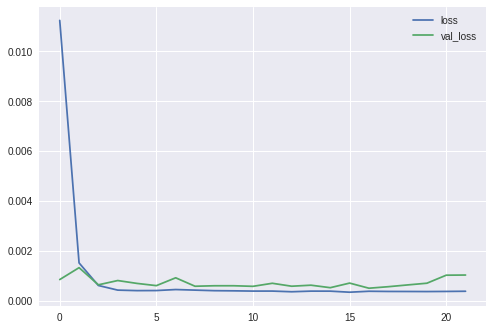

In [354]:
loss = pd.DataFrame(model.history.history)
loss.plot()

In [355]:
test_data = scaled_data[training_data_len - past_days: , :]

x_test = []
y_test = dataset[training_data_len:, 0]
for i in range(past_days, len(test_data)):
    x_test.append(test_data[i-past_days:i, :])

In [356]:
x_test = np.array(x_test)

In [357]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [358]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [359]:
predictions

array([[212.38084],
       [212.36537],
       [211.59492],
       [209.8936 ],
       [207.9316 ],
       [206.3862 ],
       [205.23169],
       [204.47314],
       [204.13127],
       [204.12013],
       [203.87984],
       [203.78181],
       [203.95009],
       [204.33963],
       [205.10072],
       [205.9973 ],
       [206.68918],
       [206.87308],
       [206.03096],
       [204.34572],
       [202.32207],
       [199.70662],
       [197.12993],
       [195.07619],
       [192.73827],
       [190.87032],
       [188.93535],
       [186.8222 ],
       [183.91507],
       [181.39656],
       [178.70583],
       [174.9878 ],
       [172.0967 ],
       [168.14493],
       [164.12643],
       [160.18193],
       [157.03479],
       [154.37189],
       [152.09125],
       [151.15738],
       [150.78278],
       [151.29146],
       [151.83496],
       [153.02122],
       [154.54506],
       [155.65182],
       [156.2923 ],
       [156.29543],
       [156.7166 ],
       [157.62404],


In [360]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
print("Root Mean Squared Error = ", rmse)

Root Mean Squared Error =  12.295763216885657


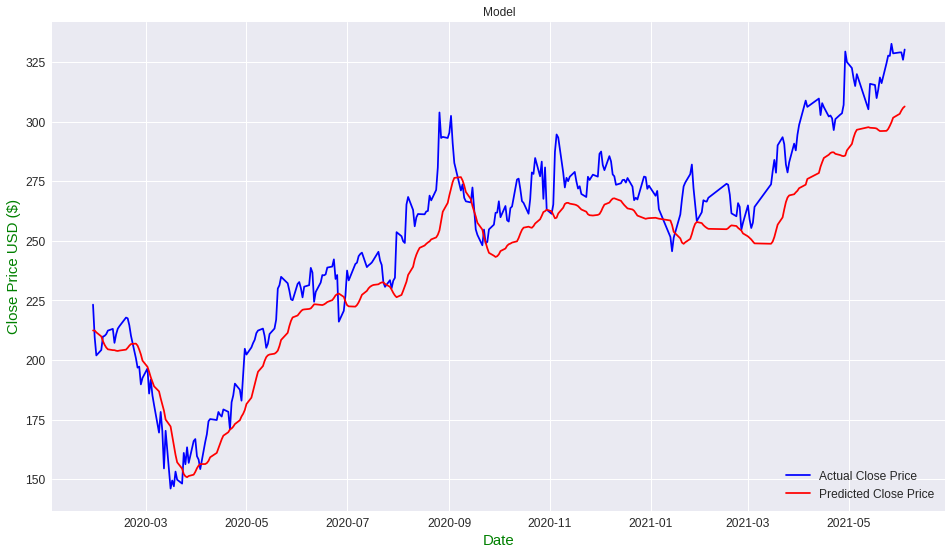

In [361]:
import copy
valid = copy.deepcopy(data[training_data_len:])
valid['Predictions'] = predictions
plt.figure(figsize=(16,9))
plt.title('Model')
plt.xlabel('Date', fontsize= 15, color = 'g')
plt.ylabel('Close Price USD ($)', fontsize = 15, color = 'g')
plt.plot(valid['Close'], color = 'blue', label = 'Actual Close Price')
plt.plot(valid['Predictions'],  color = 'red', label = 'Predicted Close Price')
plt.legend(loc = 'lower right', fontsize = 12)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.show()

In [362]:
valid

,Close,compound,negative,neutral,positive,Open,High,Low,Volume,Predictions
Date,,,,,,,,,,
2020-01-29,223.23,0.9992,0.042,0.809,0.149,221.4400,224.2000,218.4500,33610010,212.380844
2020-01-30,209.53,0.9859,0.081,0.818,0.101,206.5300,211.4300,204.7500,48775500,212.365372
2020-01-31,201.91,0.9901,0.043,0.823,0.134,208.4300,208.6900,201.0600,31359920,211.594925
2020-02-03,204.19,0.8500,0.088,0.829,0.083,203.4400,205.1400,202.5000,15510510,209.893600
2020-02-04,209.83,0.9563,0.047,0.868,0.085,206.6165,210.6000,205.2025,19628890,207.931595
...,...,...,...,...,...,...,...,...,...,...
2021-05-28,328.73,0.9937,0.049,0.845,0.105,331.0000,332.8684,328.3300,12037430,301.717590
2021-06-01,329.13,0.9976,0.046,0.836,0.118,330.1500,331.4200,326.6400,11765910,303.342773
2021-06-02,329.15,0.7719,0.070,0.835,0.095,330.3800,331.8700,327.1215,11654280,304.711060


In [363]:
import datetime

last_day = data.index[-1]
next_day = last_day + datetime.timedelta(days = 1)
print(next_day)

2021-06-05 00:00:00


In [364]:
new_df = data.filter(['Close'])
last_20_days = new_df[-20: ].values
last_20_days_scaled = scaler.transform(last_20_days)

X_test = []
X_test.append(last_20_days_scaled)

X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

pred_price = model.predict(X_test)

pred_price = scaler.inverse_transform(pred_price)
print('Predicted Close Price for {} '.format(next_day) + ' = ', pred_price)

Predicted Close Price for 2021-06-05 00:00:00  =  [[307.04706]]


In [365]:
previous = pred_price
previous_pred_price = new_df.at[str(last_day), 'Close']

In [366]:
diff=(float)(pred_price - previous_pred_price)
if(diff < 0):
  print("percentage decrease = ",round(((- (diff)/previous_pred_price)*100),4))
else:
  print("percentage increase = ",round((( (diff)/previous_pred_price)*100),4))

percentage decrease =  7.054


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



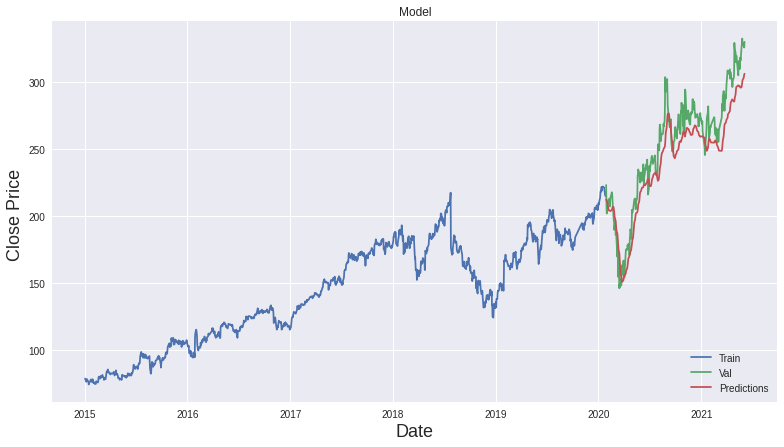

In [367]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(13,7))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price ', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [368]:
model.save('model.h5')